In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

import util

from IPython.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

In [2]:
ts_all = util.load_call_center_data()

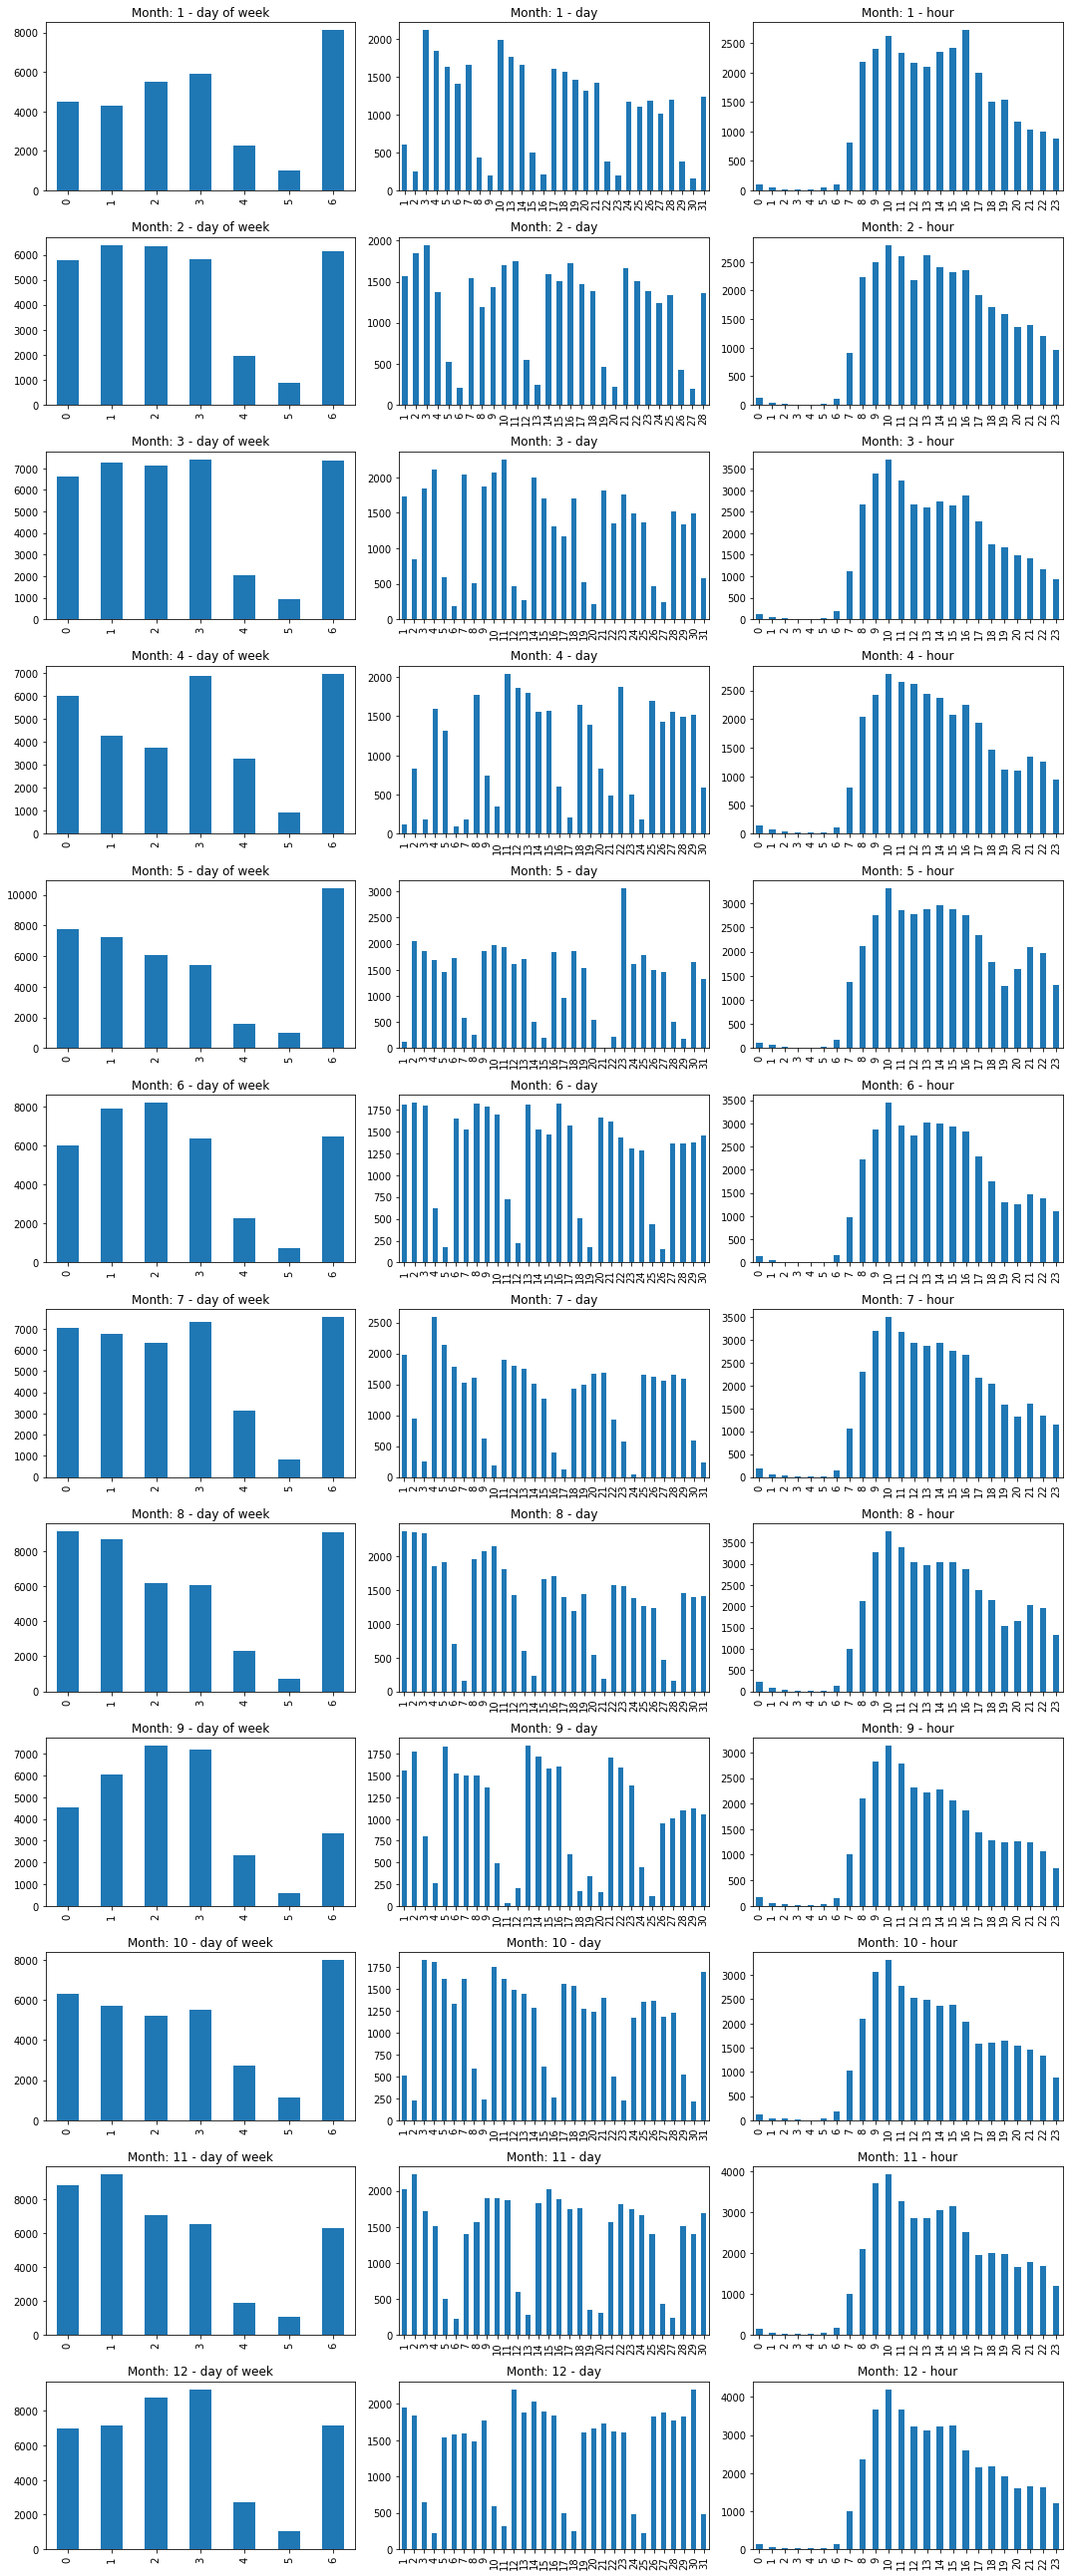

In [3]:
plt.figure(figsize=np.array((15,12*3)))

for i, (j,k) in enumerate(ts_all.groupby(ts_all.dt.month)):
    plt.subplot(12, 3, 3*i+1)
    k.groupby(k.dt.dayofweek).count().plot.bar(title= f'Month: {j} - day of week')
    
    plt.subplot(12, 3, 3*i+2)
    k.groupby(k.dt.day).count().plot.bar(title = f'Month: {j} - day')
    
    plt.subplot(12, 3, 3*i+3)
    k.groupby(k.dt.hour).count().plot.bar(title = f'Month: {j} - hour')

plt.tight_layout()

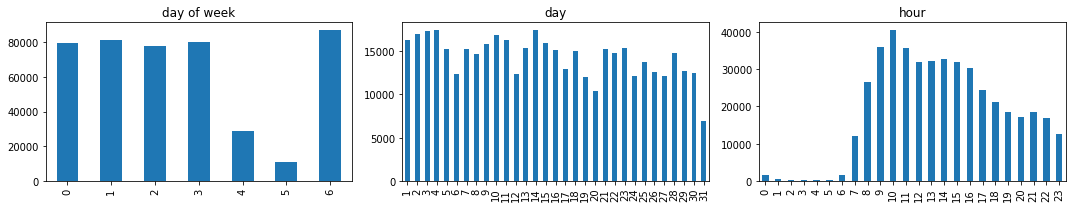

In [4]:
plt.figure(figsize=np.array((15,3)))

plt.subplot(1, 3, 1)
ts_all.groupby(ts_all.dt.dayofweek).count().plot.bar(title='day of week')

plt.subplot(1, 3, 2)
ts_all.groupby(ts_all.dt.day).count().plot.bar(title = 'day')

plt.subplot(1, 3, 3)
ts_all.groupby(ts_all.dt.hour).count().plot.bar(title = 'hour')

plt.tight_layout()

In [5]:
def ks_fit(smp):
    dif_all = (smp[1:].values - smp[:-1].values).astype(float)/10**9
    expon_params = st.expon.fit(dif_all)
    expon_fitted = st.expon(*expon_params)
    return len(smp), expon_fitted, st.ks_1samp(dif_all, expon_fitted.cdf)

In [6]:
ks_fit(ts_all)

(444448,
 KstestResult(statistic=0.23644265968954337, pvalue=0.0))

In [7]:
%%time 
np.mean([ks_fit(i[1])[2].pvalue >= .01 for i in ts_all.groupby([ts_all.dt.month, ts_all.dt.day, ts_all.dt.hour]) if len(i[1]) >= 4])

CPU times: user 9.45 s, sys: 7.4 ms, total: 9.45 s
Wall time: 9.47 s


0.9907308377896613